In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.4 MB/s 
     |████████████████████████████████| 128 kB 14.1 MB/s 
     |████████████████████████████████| 4.0 MB 44.6 MB/s 
     |████████████████████████████████| 110 kB 55.4 MB/s 
     |████████████████████████████████| 112 kB 36.1 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf
yf.pdr_override()
import sklearn.metrics as met
from sklearn import svm
from sklearn.model_selection import train_test_split

In [4]:
data = yf.download('aapl', interval='1D', period='MAX')

[*********************100%***********************]  1 of 1 completed


Graph code, taking log to preprocess

Text(0, 0.5, 'Log of AAPL price')

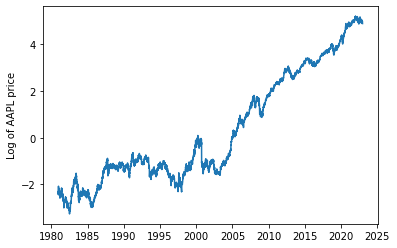

In [11]:
plt.plot(np.log(data['Adj Close']), label='historical adj close')
plt.ylabel('Log of AAPL price')

ML code. Using high to predict adj close using SVM regressor

In [8]:
X = np.log(data[['High']])
y = np.log(data['Adj Close'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, train_size=0.8, shuffle=False)

model = svm.SVR()
model.fit(X_train, y_train)
predictions_list = model.predict(X_test)
predictions_df = pd.DataFrame(predictions_list, index=y_test.index)

print("Model score:", model.score(X_test,y_test))
print("(Very Bad)")

Model score: -10.04668734597772
(Very Bad)


Model does not preform well at all. In fact, it predicts exactly the opposite of what the price does.


Plotting our prediction and the actual test values.

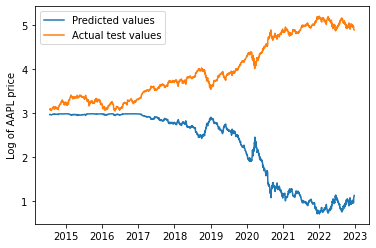

In [10]:
plt.plot(predictions_df, label="Predicted values")
plt.plot(y_test, label='Actual test values')
plt.legend()
plt.ylabel('Log of AAPL price')
plt.show()